In [1]:
using JuMP,Ipopt, LinearAlgebra, ControlSystems

In [2]:
my_optimizer = with_optimizer(Ipopt.Optimizer, print_level = 0)

MathOptInterface.OptimizerWithAttributes(Ipopt.Optimizer, Pair{MathOptInterface.AbstractOptimizerAttribute, Any}[MathOptInterface.RawParameter("print_level") => 0])

In [3]:
begin
    const c1 = 1; # Spring constant
    const c2 = 1;
    const c3 = 1;
    const m1 = 5.0; # Mass
    const m2 = 5.0;
    const m3 = 5.0;
    const m4 = 5.0;
end

5.0

In [4]:
A = [0 0 0 0 1 0 0 0; 0 0 0 0 0 1 0 0 ; 0 0 0 0 0 0 1 0 ; 0 0 0 0 0 0 0 1 ; -c1/m1 c1/m1 0 0 0 0 0 0 ; c1/m2 -(c2+c1)/m2 c2/m2 0 0 0 0 0 ; 0 c2/m3 -(c2+c3)/m3 c3/m3 0 0 0 0 ; 0 0 c3/m4 -c3/m4 0 0 0 0]

8×8 Matrix{Float64}:
  0.0   0.0   0.0   0.0  1.0  0.0  0.0  0.0
  0.0   0.0   0.0   0.0  0.0  1.0  0.0  0.0
  0.0   0.0   0.0   0.0  0.0  0.0  1.0  0.0
  0.0   0.0   0.0   0.0  0.0  0.0  0.0  1.0
 -0.2   0.2   0.0   0.0  0.0  0.0  0.0  0.0
  0.2  -0.4   0.2   0.0  0.0  0.0  0.0  0.0
  0.0   0.2  -0.4   0.2  0.0  0.0  0.0  0.0
  0.0   0.0   0.2  -0.2  0.0  0.0  0.0  0.0

In [5]:
B = [0 0 0 0 ; 0 0 0 0 ; 0 0 0 0; 0 0 0 0; 1/m1 0 0 0 ; 0 1/m2 0 0; 0 0 1/m3 0 ; 0 0 0 1/m4] # Input matrix


8×4 Matrix{Float64}:
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.2  0.0  0.0  0.0
 0.0  0.2  0.0  0.0
 0.0  0.0  0.2  0.0
 0.0  0.0  0.0  0.2

In [6]:
C = [1 0 0 0 0 0 0 0 ; 0 1 0 0 0 0 0 0 ; 0 0 1 0 0 0 0 0; 0 0 0 1 0 0 0 0 ; ] # Output matrix


4×8 Matrix{Int64}:
 1  0  0  0  0  0  0  0
 0  1  0  0  0  0  0  0
 0  0  1  0  0  0  0  0
 0  0  0  1  0  0  0  0

In [7]:
sys_c = ss( A, B, C, zeros(4,4) )


StateSpace{Continuous, Float64}
A = 
  0.0   0.0   0.0   0.0  1.0  0.0  0.0  0.0
  0.0   0.0   0.0   0.0  0.0  1.0  0.0  0.0
  0.0   0.0   0.0   0.0  0.0  0.0  1.0  0.0
  0.0   0.0   0.0   0.0  0.0  0.0  0.0  1.0
 -0.2   0.2   0.0   0.0  0.0  0.0  0.0  0.0
  0.2  -0.4   0.2   0.0  0.0  0.0  0.0  0.0
  0.0   0.2  -0.4   0.2  0.0  0.0  0.0  0.0
  0.0   0.0   0.2  -0.2  0.0  0.0  0.0  0.0
B = 
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.2  0.0  0.0  0.0
 0.0  0.2  0.0  0.0
 0.0  0.0  0.2  0.0
 0.0  0.0  0.0  0.2
C = 
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0
D = 
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0

Continuous-time state-space model

In [8]:
Ts = 0.1
sys_d = c2d(sys_c, Ts)

StateSpace{Discrete{Float64}, Float64}
A = 
  0.9990003332777834       0.0009995000999888902   1.6661111904696678e-7   1.1108730387993082e-11  0.09996667333253974     3.332333476178134e-5   3.3325397707171583e-9  1.587037057961754e-13
  0.00099950009998889      0.9980009997889134      0.0009993334999785736   1.666111190469667e-7    3.332333476178133e-5    0.09993335333031773    3.332000238071431e-5   3.3325397707171546e-9
  1.6661111904696675e-7    0.000999333499978573    0.9980009997889134      0.0009995000999888897   3.3325397707171575e-9   3.3320002380714325e-5  0.09993335333031773    3.332333476178132e-5
  1.1108730387993066e-11   1.6661111904696656e-7   0.00099950009998889     0.9990003332777833      1.5870370579617432e-13  3.332539770717151e-9   3.332333476178132e-5   0.09996667333253974
 -0.019986669999555597     0.0199800059991112      6.663333968188722e-6    6.664762134022716e-10   0.9990003332777835      0.0009995000999888902  1.6661111904696675e-7  1.1108730387993102e-11
  0

In [9]:
Ad = sys_d.A 
Bd = sys_d.B
Cd = sys_d.C

4×8 Matrix{Float64}:
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0

In [10]:
Nx = size(Ad) # size(A) == size(Ad) -> 8x8 -> Nx=8 
Ny = size(Cd) # Number of outputs
Nu = size(Bd)

(8, 4)

In [11]:
Id8 =1* Matrix(I, 4, 4)
p = zeros(Int8, 8, 4)
R = C*Ad
Ã = [Ad p ; R Id8]

12×12 Matrix{Float64}:
  0.999         0.0009995     1.66611e-7   …  1.58704e-13  0.0  0.0  0.0  0.0
  0.0009995     0.998001      0.000999333     3.33254e-9   0.0  0.0  0.0  0.0
  1.66611e-7    0.000999333   0.998001        3.33233e-5   0.0  0.0  0.0  0.0
  1.11087e-11   1.66611e-7    0.0009995       0.0999667    0.0  0.0  0.0  0.0
 -0.0199867     0.01998       6.66333e-6      1.11087e-11  0.0  0.0  0.0  0.0
  0.01998      -0.03996       0.0199733    …  1.66611e-7   0.0  0.0  0.0  0.0
  6.66333e-6    0.0199733    -0.03996         0.0009995    0.0  0.0  0.0  0.0
  6.66476e-10   6.66333e-6    0.01998         0.999        0.0  0.0  0.0  0.0
  0.999         0.0009995     1.66611e-7      1.58704e-13  1.0  0.0  0.0  0.0
  0.0009995     0.998001      0.000999333     3.33254e-9   0.0  1.0  0.0  0.0
  1.66611e-7    0.000999333   0.998001     …  3.33233e-5   0.0  0.0  1.0  0.0
  1.11087e-11   1.66611e-7    0.0009995       0.0999667    0.0  0.0  0.0  1.0

In [12]:
B̃ = [Bd ; C*Bd]

12×4 Matrix{Float64}:
 0.000999833  1.66633e-7   1.11091e-11  3.96772e-16
 1.66633e-7   0.000999667  1.66622e-7   1.11091e-11
 1.11091e-11  1.66622e-7   0.000999667  1.66633e-7
 3.96772e-16  1.11091e-11  1.66633e-7   0.000999833
 0.0199933    6.66467e-6   6.66508e-10  3.17407e-14
 6.66467e-6   0.0199867    6.664e-6     6.66508e-10
 6.66508e-10  6.664e-6     0.0199867    6.66467e-6
 3.17407e-14  6.66508e-10  6.66467e-6   0.0199933
 0.000999833  1.66633e-7   1.11091e-11  3.96772e-16
 1.66633e-7   0.000999667  1.66622e-7   1.11091e-11
 1.11091e-11  1.66622e-7   0.000999667  1.66633e-7
 3.96772e-16  1.11091e-11  1.66633e-7   0.000999833

In [13]:
 C̃ = hcat(zeros(Ny), diagm(ones(4)))


4×12 Matrix{Float64}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0

In [14]:
mech_osc_mmpc(x,u) = Ã * x + B̃ * u # System dynamics in MMPC formulation

mech_osc_mmpc (generic function with 1 method)

In [15]:
function mpc_emo(z_init)
    
    model = Model(my_optimizer)
    
    ΔT = 0.1            #  Sampling time
    n_horizon = 20;     # MPC horizon
    Nz = size(Ã)[1] # Number of states z
    Nu = size(B̃)[2]
    Ny = size(C̃)[1] # Number of outputs
    
    
    # Input constraints
    Δumin = -100.0
    Δumax = 100.0 
    ref = [0.0, 0.0, 0.0, 0.0] # Reference 
    @variables model begin
        # x[1: Nx, 1:n_horizon]    # States
        y[1: Ny, 1:n_horizon] # Output
        z[1:Nz, 1:n_horizon] # New state
        
        e[1:Ny, 1:n_horizon]    # Errors = Reference - Outputs
        Δumin <= Δu[1:Nu, 1:(n_horizon-1)] <= Δumax  # Input constraints
    end
     

    @constraint(model, z[1:Nz, 1] .== z_init)     # Initial values

    for i = 1 : n_horizon
        @constraint(model, y[1:Ny, i] .== C̃ * z[1:Nz, i] )  # Output y(n) = C̃ z(n)  
    end
    
    @constraint(model, [k=1:n_horizon], e[:, k] .== ref[:] - y[:, k])   # Error = Reference - States
    @constraint(model, [k=1:n_horizon-1], z[:, k+1] .==  mech_osc_mmpc(z[:,k], Δu[:,k])) # System dynamics with new state
   
    J_err = @NLexpression(model, 100*sum(e[n,k]^2 for n=1:Ny, k=1:n_horizon))
    J_in = @NLexpression(model, sum(Δu[j,k]^2 for j = 1:Nu, k = 1:n_horizon-1))
    J = @NLexpression(model, J_err + J_in )

    @NLobjective( model, Min, J)
    
    optimize!(model)

    return JuMP.value.(z), JuMP.value.(Δu), JuMP.value.(e)
end



mpc_emo (generic function with 1 method)

In [16]:
Δx_val = zeros(8,49)


8×49 Matrix{Float64}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0

In [17]:
Δx_val = zeros(8,49)
using JLD
x_val = load("data.jld")["data"]

8×50 Matrix{Float64}:
  1.0           0.992192      0.970344     …  -0.0109645    -0.00993288
  0.0          -4.84571e-5   -0.000121897      0.00196081    0.00155029
  0.0          -3.30724e-5   -0.000124651      0.000348126   0.000373793
  0.0           7.48945e-7    3.05422e-6      -9.12503e-5   -8.818e-5
 -4.343e-26    -0.156139     -0.280742         0.0104591     0.0101683
 -7.18283e-28  -0.00099496   -0.000546496  …  -0.00431516   -0.00388887
  3.22452e-27  -0.000661386  -0.00116982       0.000290419   0.000221398
  1.76206e-28   1.48661e-5    3.09263e-5       2.82171e-5    3.32648e-5

In [18]:
for i in 1:49
    Δx_val[:, i] = x_val[:, i+1] - x_val[:, i]
end
    

In [19]:
ypos = Cd * x_val


4×50 Matrix{Float64}:
 1.0   0.992192     0.970344      0.937415     …  -0.0109645    -0.00993288
 0.0  -4.84571e-5  -0.000121897  -0.000101621      0.00196081    0.00155029
 0.0  -3.30724e-5  -0.000124651  -0.000260644      0.000348126   0.000373793
 0.0   7.48945e-7   3.05422e-6    6.94724e-6      -9.12503e-5   -8.818e-5

In [20]:
ypos = ypos[:,1:end-1]

4×49 Matrix{Float64}:
 1.0   0.992192     0.970344      0.937415     …  -0.0120183    -0.0109645
 0.0  -4.84571e-5  -0.000121897  -0.000101621      0.00241447    0.00196081
 0.0  -3.30724e-5  -0.000124651  -0.000260644      0.000315315   0.000348126
 0.0   7.48945e-7   3.05422e-6    6.94724e-6      -9.37808e-5   -9.12503e-5

In [21]:
zpos = vcat(Δx_val,ypos)

12×49 Matrix{Float64}:
 -0.00780825   -0.0218477    -0.0329288    …   0.0010538     0.00103161
 -4.84571e-5   -7.34403e-5    2.02765e-5      -0.000453666  -0.000410515
 -3.30724e-5   -9.15789e-5   -0.000135993      3.28111e-5    2.56674e-5
  7.48945e-7    2.30527e-6    3.89302e-6       2.53042e-6    3.07033e-6
 -0.156139     -0.124603     -0.0969826       -0.000152841  -0.000290766
 -0.00099496    0.000448464   0.00138816   …   0.000436351   0.000426292
 -0.000661386  -0.000508429  -0.000379239     -7.36612e-5   -6.9021e-5
  1.48661e-5    1.60602e-5    1.55415e-5       5.72474e-6    5.04776e-6
  1.0           0.992192      0.970344        -0.0120183    -0.0109645
  0.0          -4.84571e-5   -0.000121897      0.00241447    0.00196081
  0.0          -3.30724e-5   -0.000124651  …   0.000315315   0.000348126
  0.0           7.48945e-7    3.05422e-6      -9.37808e-5   -9.12503e-5

In [22]:
u_hist = zeros(4,0)
z_hist = zeros(12,0)

12×0 Matrix{Float64}

In [23]:
zpos_new = zpos[:,1]

12-element Vector{Float64}:
 -0.007808246744595793
 -4.845713168491082e-5
 -3.307242355244581e-5
  7.489446194138775e-7
 -0.15613906720364776
 -0.000994959902310029
 -0.0006613861469649292
  1.4866148646285156e-5
  1.0
  0.0
  0.0
  0.0

In [24]:
# zpos_new = 2*rand(12) # Only for testing
# zpos_new = zeros(12) # Only for testing
# zpos_new[9] = 1

In [25]:
zpos_new

12-element Vector{Float64}:
 -0.007808246744595793
 -4.845713168491082e-5
 -3.307242355244581e-5
  7.489446194138775e-7
 -0.15613906720364776
 -0.000994959902310029
 -0.0006613861469649292
  1.4866148646285156e-5
  1.0
  0.0
  0.0
  0.0

In [26]:
zpos_plan_last = zeros(length(zpos_new),20)
u_plan_last = zeros(4,19)

4×19 Matrix{Float64}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0

In [27]:
for i = 1 : 50
    z_plan, Δu_plan, e_plan = mpc_emo(zpos_new)
    z_hist = hcat(z_hist, z_plan[:,1])
    u_hist = hcat(u_hist, Δu_plan[:,1])
    zpos_new = mech_osc_mmpc(z_plan[:,1], Δu_plan[:,1])
    zpos_plan_last = z_plan
    u_plan_last = Δu_plan 
end


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************



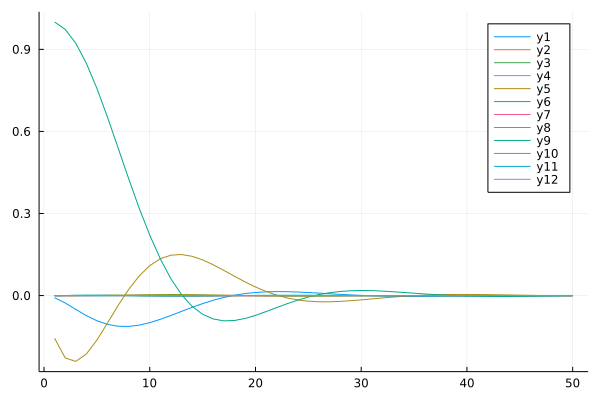

In [54]:
plot(z_hist')

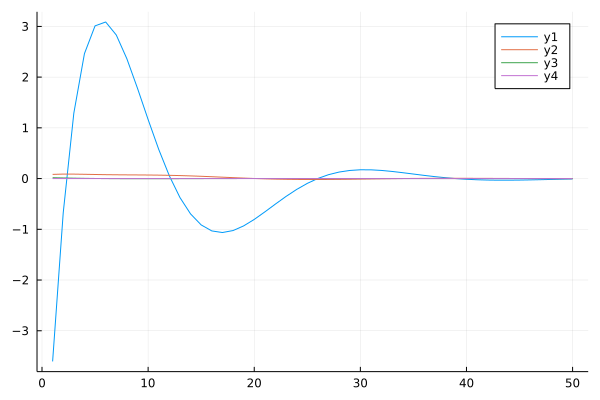

In [55]:
plot(u_hist')

In [30]:
savefig("reshapeU")

LoadError: UndefVarError: savefig not defined

In [31]:
plot(zpos_plan_last')

LoadError: UndefVarError: plot not defined

In [32]:
plot(u_plan_last')

LoadError: UndefVarError: plot not defined

In [33]:
z_plan, Δu_plan, e_plan = mpc_emo(zpos[:,1])

([-0.007808246744595793 -0.02701365870312771 … 0.04634616456106385 0.06434271200344197; -4.845713168491082e-5 -7.898293048634436e-5 … -0.002155062741028731 -0.002302433771529471; … ; 0.0 -8.168636921786013e-5 … 0.0001740437790697176 0.0001859104687947624; 0.0 1.955482288393876e-6 … -3.4501688454324726e-6 -1.5370547566535254e-6], [-3.605047389070576 -0.7245502288421248 … -0.01414712749282668 -0.004117926280773509; 0.08249482008269217 0.09154442583415569 … 0.0025373320222750097 0.0005553830844224487; 0.017488793069547898 0.01237173759197311 … -9.013003195229971e-5 -1.849218631881316e-5; -0.00022667898381020562 -0.00018979521290903 … 9.073334818260254e-7 1.5058815122864507e-7], [-1.0 -0.9729863412968722 … 0.02315565869299915 -0.04118705331044281; 0.0 7.898293048634436e-5 … 0.0032601450077560474 0.005562578779285518; 0.0 8.168636921786013e-5 … -0.0001740437790697176 -0.0001859104687947624; 0.0 -1.955482288393876e-6 … 3.4501688454324726e-6 1.5370547566535254e-6])

In [34]:
plot(z_plan')

LoadError: UndefVarError: plot not defined

In [35]:
plot(Δu_plan')

LoadError: UndefVarError: plot not defined

In [36]:
Δu_plan

4×19 Matrix{Float64}:
 -3.60505      -0.72455       1.19444      …  -0.0141471   -0.00411793
  0.0824948     0.0915444     0.0927889        0.00253733   0.000555383
  0.0174888     0.0123717     0.00807268      -9.013e-5    -1.84922e-5
 -0.000226679  -0.000189795  -0.000142612      9.07333e-7   1.50588e-7

In [37]:
zpos = mech_osc_mmpc(z_plan[:,1], Δu_plan[:,1])

12-element Vector{Float64}:
 -0.02701365870312771
 -7.898293048634437e-5
 -8.168636921786012e-5
  1.955482288393876e-6
 -0.227905251416188
  0.00032046094115015765
 -0.00031066425055287564
  9.09852327133495e-6
  0.9729863412968722
 -7.898293048634437e-5
 -8.168636921786012e-5
  1.955482288393876e-6

In [38]:
z_plan, Δu_plan, e_plan = mpc_emo(zpos)

([-0.02701365870312771 -0.05044389789535034 … 0.05350531865509406 0.06955914555239856; -7.898293048634437e-5 6.866090209064039e-6 … -0.0017203884383921633 -0.0016897217700879979; … ; -8.168636921786012e-5 -0.00018189531456670708 … 0.00014596828340697606 0.00012503763624686792; 1.955482288393876e-6 4.5404486062974976e-6 … -2.300674244226832e-6 2.5875524450182904e-7], [-0.6743728760148606 1.22638032967654 … -0.02935147774339823 -0.007264345519477822; 0.0884928930031862 0.09035623537307612 … 0.0023138851550464435 0.0004996372149114496; 0.012420541549657643 0.008137286419868755 … -6.315563488675356e-5 -1.241620099998256e-5; -0.0001882019347346213 -0.00014242125348521367 … 9.120590240113958e-8 -2.7949193315969434e-8], [-0.9729863412968722 -0.9225424434015218 … -0.003097252287499156 -0.07265639783989772; 7.898293048634437e-5 7.211684027728033e-5 … 0.0033204479136874224 0.005010169683775421; 8.168636921786012e-5 0.00018189531456670708 … -0.00014596828340697606 -0.00012503763624686792; -1.9554

In [39]:
plot(z_plan')

LoadError: UndefVarError: plot not defined

In [40]:
Δu_plan

4×19 Matrix{Float64}:
 -0.674373      1.22638       2.35129     …  -0.0293515   -0.00726435
  0.0884929     0.0903562     0.0884908       0.00231389   0.000499637
  0.0124205     0.00813729    0.00465052     -6.31556e-5  -1.24162e-5
 -0.000188202  -0.000142421  -9.40284e-5      9.12059e-8  -2.79492e-8

In [41]:
zpos = mech_osc_mmpc(z_plan[:,1], Δu_plan[:,1])
z_plan, Δu_plan, e_plan = mpc_emo(zpos)

([-0.05044389789535034 -0.07315703004649919 … 0.05566833005229828 0.06925686630294428; 6.866090209064026e-6 0.00016808240428060499 … -0.001254248718072248 -0.0010767261622289216; … ; -0.00018189531456670708 -0.00027963499288180196 … 0.00011273887078744512 6.521266896376531e-5; 4.5404486062974976e-6 7.224610913470192e-6 … -1.0643843120040852e-6 1.895961874765027e-6], [1.290685366231178 2.3922053492594113 … -0.039596431814127316 -0.009308082896155546; 0.08789215463161848 0.08630699169922953 … 0.0020196189499348265 0.0004292876924656399; 0.00814609722424302 0.004685152748404027 … -3.6125639136040436e-5 -6.447417123638826e-6; -0.00014008511589073199 -9.296661538897837e-5 … -6.704045762113708e-7 -1.906464686294333e-7], [-0.9225424434015218 -0.8493854133550226 … -0.023840194928695515 -0.09309706123163979; 7.211684027728034e-5 -9.596556400332464e-5 … 0.0032331110274054125 0.004309837189634334; 0.00018189531456670708 0.00027963499288180196 … -0.00011273887078744512 -6.521266896376531e-5; -4.54

In [42]:
plot(z_plan')

LoadError: UndefVarError: plot not defined

In [43]:
plot(Δu_plan')

LoadError: UndefVarError: plot not defined

In [44]:
zpos = mech_osc_mmpc(z_plan[:,1], Δu_plan[:,1])
z_plan, Δu_plan, e_plan = mpc_emo(zpos)

([-0.07315703004649919 -0.09196977229286185 … 0.05381165915211226 0.06467461927911922; 0.00016808240428060499 0.0003551067548083973 … -0.0007827906354081947 -0.000492279493297981; … ; -0.00027963499288180196 -0.00036136787562236343 … 7.744196958157505e-5 1.0281333788395709e-5; 7.224610913470192e-6 9.579280883986967e-6 … 1.3755764397348294e-7 3.2495859579770554e-6], [2.463700206271992 2.938245866104135 … -0.04525142002053763 -0.010347836071140808; 0.08445383893691044 0.08171544230677406 … 0.0016696627007001508 0.0003479752275836047; 0.004659286775047585 0.0019792448101648447 … -1.0875001915303992e-5 -9.696726436274725e-7; -9.008349778765018e-5 -4.719329340137964e-5 … -1.3165008312506647e-6 -3.2507188249766974e-7], [-0.8493854133550226 -0.7574156410621607 … -0.03882157140863322 -0.10349619068775243; -9.596556400332464e-5 -0.00045107231881172193 … 0.003005886233342526 0.003498165726640507; 0.00027963499288180196 0.00036136787562236343 … -7.744196958157505e-5 -1.0281333788395709e-5; -7.224

In [45]:
plot(z_plan')

LoadError: UndefVarError: plot not defined

In [46]:
plot(Δu_plan')

LoadError: UndefVarError: plot not defined

In [47]:
zpos = mech_osc_mmpc(z_plan[:,1], Δu_plan[:,1])
z_plan, Δu_plan, e_plan = mpc_emo(zpos)

([-0.09196977229286185 -0.10512410754863662 … 0.048955664923483036 0.05705599424287074; 0.0003551067548083973 0.0005224856584724447 … -0.00033122745602878176 3.7801777964237484e-5; … ; -0.00036136787562236343 -0.00041947329209206843 … 4.2700241771688554e-5 -3.695768308517413e-5; 9.579280883986967e-6 1.130352900331774e-5 … 1.20825679190506e-6 4.239552390709971e-6], [3.011003558054045 3.017729293879041 … -0.04692333865097725 -0.01052991219269356; 0.08047297967796957 0.07776671809081598 … 0.0012839414796986062 0.00026025909751119345; 0.0019254905919958494 -3.833974651942445e-5 … 1.1228581768489001e-5 3.738020802432571e-6; -4.3991904221228023e-5 -8.978883825376158e-6 … -1.8061724509777146e-6 -4.232658435470538e-7], [-0.7574156410621607 -0.6522915335135241 … -0.04826111494311279 -0.10531710918598353; -0.00045107231881172193 -0.0009735579772841667 … 0.002658809430992809 0.002621007653028571; 0.00036136787562236343 0.00041947329209206843 … -4.2700241771688554e-5 3.695768308517413e-5; -9.57928

In [48]:
plot(z_plan')

LoadError: UndefVarError: plot not defined

In [49]:
#for i in 1:49
    
    # Run the MPC control optimization
    #x_plan, u_plan, e_plan = mpc_emo(xpos)
    
    #z_plan, Δu_plan, e_plan = mpc_emo(zpos[:,i])
    
    # Save states
    #z_hist = hcat(z_hist, z_plan[:,1])
    #u_hist = hcat(u_hist, Δu_plan)
    # Apply the planned input signals and simulate one step in time
    
     #zpos = mech_osc_mmpc(z_plan[:,1], Δu_plan[:,1])
#end

In [50]:
u_hist

4×50 Matrix{Float64}:
 -3.60505      -0.674373      1.29069      …  -0.0120992    -0.00760562
  0.0824948     0.0884929     0.0878922       -0.000908061  -0.00116
  0.0174888     0.0124205     0.0081461        0.000126024   0.000110449
 -0.000226679  -0.000188202  -0.000140085     -3.0871e-6    -1.67418e-6

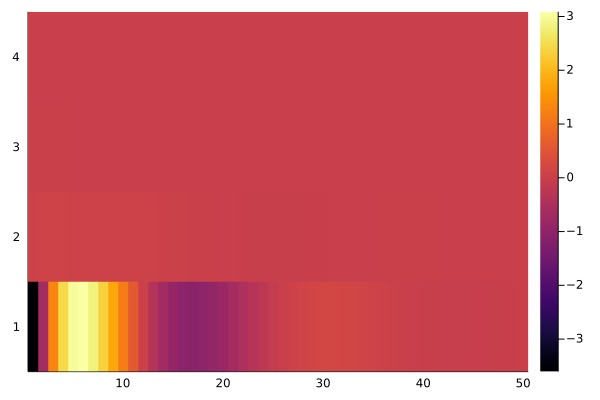

In [51]:
using Plots
heatmap(u_hist)

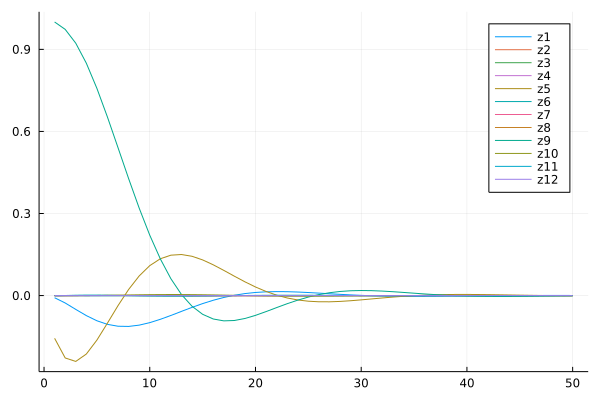

In [52]:

plot(z_hist', labels=["z1" "z2" "z3" "z4" "z5" "z6" "z7" "z8" "z9" "z10" "z11" "z12"])

In [53]:
savefig("zhistRmpc")